In [1]:
# Import required libraries
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

In [2]:
#Import RDKit and Mordred libraries
from rdkit import Chem
from rdkit.Chem import Draw
from mordred import Calculator, descriptors

In [3]:
#Allows figures to be visualized in jupyter notebook
%matplotlib inline

In [4]:
# Sets Pandas Display to Monitor Code
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [5]:
# Create Mordred Calculator
calc = Calculator(descriptors, ignore_3D=True)

#Get Mordred calcs
def get_Mordred(data_input):
    # Assigns Reactants Mordred Info
    reactants = data_input['Substrate']
    
    reactants_mol_list = []
    for inChi_reactants in reactants:
      reactants_mol = Chem.MolFromInchi(inChi_reactants)
      reactants_mol_list.append(reactants_mol)

    # Puts reactants into Pandas Type
    reactant_data = []
    reactant_data = calc.pandas(reactants_mol_list)
       
    #Joins Mordred parameters with experimental, atomic charges, and JChem for Excel parameters
    add_reactants = pd.concat((data_input, reactant_data), axis=1)
    
    #Force any non-numeric entries as NaN and replace them with 0
    int_data = add_reactants.apply(pd.to_numeric, errors='coerce')
    
    output = int_data.fillna(0)#, inplace=True)

    return output

In [6]:
# Read Training/Test data input File
data = pd.read_csv('BorylationTrainingTest 9-26-24.csv')

#Convert substrates to Mordred features
data = get_Mordred(data)

100%|██████████| 1027/1027 [01:47<00:00,  9.57it/s]


In [7]:
# Seperate dataset as response variable (Product Ratio) and feature variables
#Note: Product Ratio is described as "0" for non-borylating sites and "1" for borylating sites
X = data.drop('Product_Ratio' , axis = 1)
y = data['Product_Ratio']

In [8]:
X = X[['Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge', 
       'ESP Hydrogen Charge', 'NPA Hydrogen Charge', 'Mulliken Heavy Charge', 'Mulliken Hydrogen Charge', 
       'Steric Effect Index', 'Atomic_Polarizability', 'Distance Degree', 'Dreiding Energy', 'AATS0i', 'AATS4i', 'ATSC1d', 'AATSC5s', 'AATSC5v', 'AATSC1pe', 'MATS3Z', 'GATS3c', 'BCUTZ-1l', 'IC2', 'SIC1']]

X = X.rename(columns = {'Hirshfeld Heavy Atom Charge':'Hirshfeld Heavy Atom Charge', 'Hirshfeld Carbon Charge':'Hirshfeld Carbon Charge', 'Hirshfeld Hydrogen Charge':'Hirshfeld Hydrogen Charge', 'ESP Heavy Atom Charge':'ESP Heavy Atom Charge', 
                        'ESP Hydrogen Charge':'ESP Hydrogen Charge', 'NPA Hydrogen Charge':'NPA Hydrogen Charge', 'Mulliken Heavy Charge':'Mulliken Heavy Atom Charge', 'Mulliken Hydrogen Charge':'Mulliken Hydrogen Charge', 
                        'Steric Effect Index':'Steric Effect Index', 'Atomic_Polarizability':'Atomic Polarizability', 'Distance Degree':'Distance Degree', 'Dreiding Energy':'Dreiding Energy', 
                        'AATS0i':'AATS0i', 'AATS4i':'AATS4i', 'ATSC1d':'ATSC1d', 'AATSC5s':'AATSC5s', 'AATSC5v':'AATSC5v', 'AATSC1pe':'AATSC1pe', 'MATS3Z':'MATS3Z', 'GATS3c':'GATS3c', 'BCUTZ-1l':'BCUTZ-1l', 'IC2':'IC2', 'SIC1':'SIC1'})
 

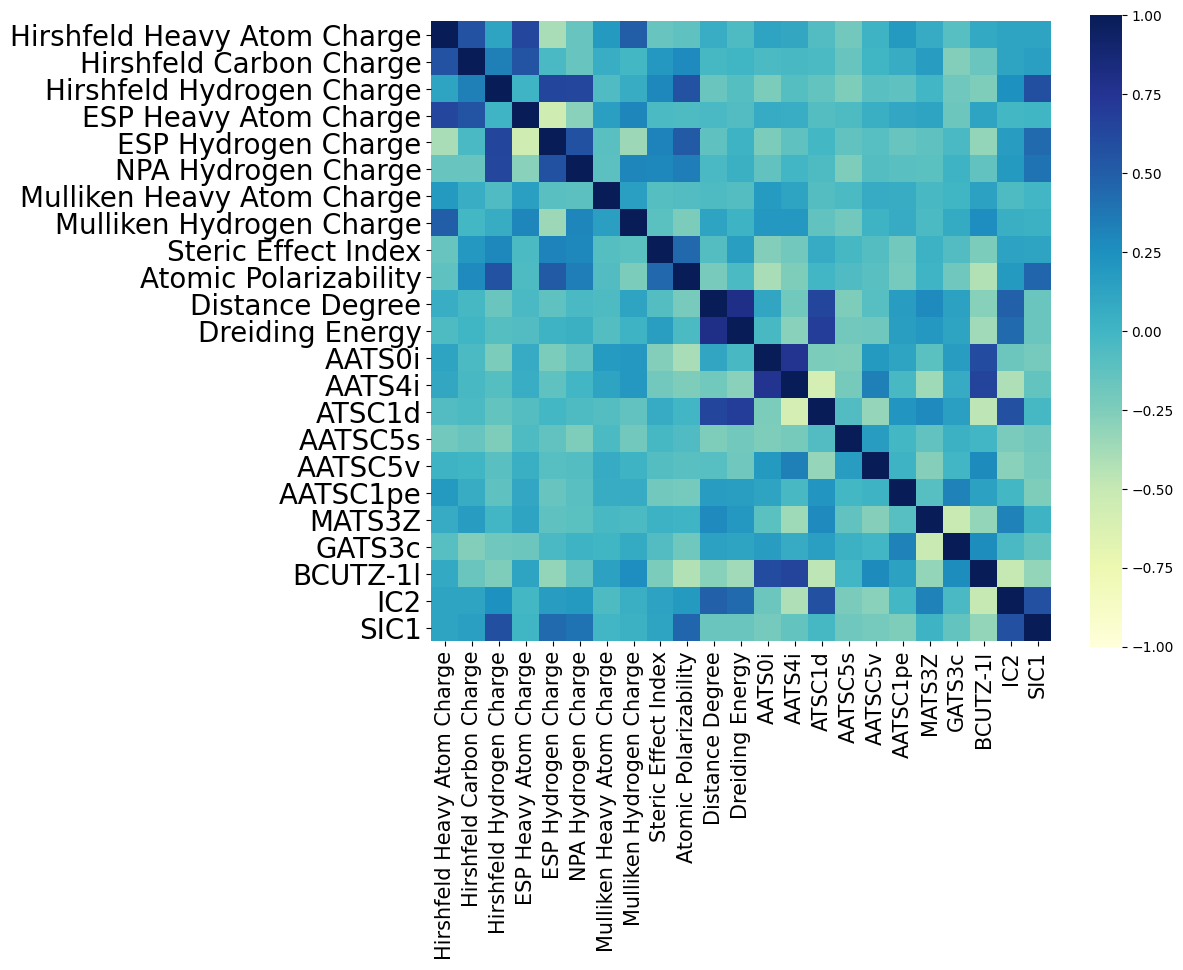

In [9]:
#Visualize the spearman correlation of the final features of dataset

corr_matrix = X.corr(method='spearman')

plt.figure(figsize = (10, 10))#,dpi=1000)
ax = sns.heatmap(
    corr_matrix, 
    annot =False,
    vmin=-1, vmax=1, center=0,
    cmap="YlGnBu",
    square=True,
    cbar_kws={'shrink': 0.82},
    annot_kws={"size": 5},  
    xticklabels = "auto",
    yticklabels = "auto"
   )
plt.yticks(fontsize=20)
plt.xticks(fontsize=15, rotation=90)
plt.savefig('CorrelationFigure9-27.tiff', bbox_inches='tight',dpi=1000)
plt.show()

In [10]:
corr_matrix.to_csv("corr_matrix.csv", index=False)

In [11]:
corr_matrix

,Hirshfeld Heavy Atom Charge,Hirshfeld Carbon Charge,Hirshfeld Hydrogen Charge,ESP Heavy Atom Charge,ESP Hydrogen Charge,NPA Hydrogen Charge,Mulliken Heavy Atom Charge,Mulliken Hydrogen Charge,Steric Effect Index,Atomic Polarizability,Distance Degree,Dreiding Energy,AATS0i,AATS4i,ATSC1d,AATSC5s,AATSC5v,AATSC1pe,MATS3Z,GATS3c,BCUTZ-1l,IC2,SIC1
Hirshfeld Heavy Atom Charge,1.000000,0.565052,0.125582,0.633838,-0.392044,-0.152488,0.191124,0.506163,-0.151476,-0.122599,0.056780,-0.051323,0.127540,0.094922,-0.068783,-0.198762,0.016721,0.192953,0.071797,-0.091407,0.090073,0.117289,0.128072
Hirshfeld Carbon Charge,0.565052,1.000000,0.332196,0.560624,-0.038636,-0.150525,0.059791,-0.007909,0.196876,0.285003,-0.019611,0.000709,-0.046559,-0.031126,-0.040528,-0.148808,0.002897,0.064001,0.174259,-0.265227,-0.157060,0.132509,0.148908
Hirshfeld Hydrogen Charge,0.125582,0.332196,1.000000,0.013874,0.644574,0.640516,-0.060772,0.067262,0.293739,0.568297,-0.160029,-0.085727,-0.241499,-0.080920,-0.135104,-0.246963,-0.094685,-0.119093,-0.002993,-0.181121,-0.249458,0.245382,0.593745
ESP Heavy Atom Charge,0.633838,0.560624,0.013874,1.000000,-0.552790,-0.287350,0.152001,0.303457,-0.039725,-0.047963,-0.032478,-0.065832,0.073622,0.060767,-0.073037,-0.050187,0.049199,0.103411,0.121922,-0.173270,0.121959,-0.008289,0.000516
ESP Hydrogen Charge,-0.392044,-0.038636,0.644574,-0.552790,1.000000,0.577354,-0.099000,-0.346717,0.313428,0.520817,-0.124517,0.018170,-0.235047,-0.122376,-0.009072,-0.128160,-0.091978,-0.154658,-0.117941,-0.031803,-0.317760,0.179369,0.437540
NPA Hydrogen Charge,-0.152488,-0.150525,0.640516,-0.287350,0.577354,1.000000,-0.113090,0.298724,0.294862,0.338639,-0.033541,0.041770,-0.128557,-0.000985,-0.051874,-0.245396,-0.072217,-0.101562,-0.107374,0.021549,-0.128351,0.188194,0.393627
Mulliken Heavy Atom Charge,0.191124,0.059791,-0.060772,0.152001,-0.099000,-0.113090,1.000000,0.150161,-0.084486,-0.062873,-0.048964,-0.072259,0.181422,0.123029,-0.073181,-0.042281,0.075036,0.063205,-0.026232,0.002074,0.146005,-0.047208,-0.001933
Mulliken Hydrogen Charge,0.506163,-0.007909,0.067262,0.303457,-0.346717,0.298724,0.150161,1.000000,-0.108153,-0.238336,0.129429,0.023357,0.198486,0.202578,-0.125369,-0.202223,0.018121,0.077507,-0.041108,0.082031,0.257893,0.047622,0.038864
Steric Effect Index,-0.151476,0.196876,0.293739,-0.039725,0.313428,0.294862,-0.084486,-0.108153,1.000000,0.447634,-0.077364,0.158776,-0.263736,-0.200877,0.074321,-0.019937,-0.076827,-0.203022,0.025330,-0.065079,-0.239679,0.139499,0.122237
Atomic Polarizability,-0.122599,0.285003,0.568297,-0.047963,0.520817,0.338639,-0.062873,-0.238336,0.447634,1.000000,-0.226130,-0.043976,-0.393111,-0.244305,-0.002787,-0.062480,-0.093780,-0.210588,0.008660,-0.182208,-0.425752,0.193495,0.456647
